# Clean old DEA license
using unsupervised learning or active learning.

In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame as DF, Series as Ser
from matplotlib import pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans

from save_figure_per_user import save_figure_per_user
from rgb_to_hex import rgb_to_hex
import os, platform

In [57]:
# Read the image
base_dir = "/Users/jonathan/Development/Git/Data-Scientist/" \
    "Machine-Learning-Usupervised-DEA-Cleanup/"

# Comment out one of these:
png_name = "DEA-2021-2024-redacted.png"
#png_name = "DEA-2021-2024.png"

png_path = base_dir + png_name

img = Image.open(png_path)

# Convert to numpy array
png_array = np.asarray(img)
im_height, im_width = (img.height, img.width)
print([im_height, im_width])

[3300, 2548]


In [58]:
'''
def show_image(img):
    # Show the image
    plt.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,        # ticks along the left edge are off
    labelleft=False,   # labels along the left edge are off
    labelbottom=False) # labels along the bottom edge are off
    
    plt.title("Original Image")
    plt.imshow(img, cmap="gray")
    plt.show()

show_image(img)
'''
None

In [59]:
# Convert to array of RGB-triples (delete alpha-values)
img_rgb = png_array.ravel().reshape(im_height*im_width, 4)[:, :3]

# Convert numpy array of image to dataframe
features = ['r', 'g', 'b']
pd.options.display.max_rows = 4
df = DF(img_rgb, columns=features)

In [60]:
# Make histograms of RGB-colors' frequency by value
'''
colornames = ['Red', 'Green', 'Blue']
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True, 
                       layout='tight')
plt.suptitle("RGB-Frequency Histograms by Value")
for idx, df_onefeature in list(enumerate([df[feature] \
                            for feature in features])):
    ax[idx].hist(df_onefeature, bins=8, color=features[idx])
    ax[idx].grid()
    ax[idx].set_yscale(value='log')
    ax[idx].set_xlabel('Value')

    if idx == 0:
        ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('RGB-Channel: ' + colornames[idx])
save_figure_per_user("Fig-1-RGB-Frequency-Histograms")
plt.show()
'''
None

In [61]:
# Perform K-means clustering on pairs of RGB-colors
kmeans = KMeans(n_clusters=4, random_state=1)
'''
# First, do scatter graphs:
color_pairs = [['r', 'g'], ['g', 'b'], ['b', 'r']]
colorname_pairs = [['Red', 'Green'], ['Green', 'Blue'], 
                   ['Blue', 'Red']]
fig, ax = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True, 
                       layout='tight')
plt.subplots_adjust(wspace=10)
plt.suptitle("Scatterplots by RGB-Channel Pairs")
for idx, df_2cols in list(enumerate([df.loc[:, 
                c_pair] for c_pair in color_pairs])):
    ax[idx].scatter(df_2cols.iloc[:, 0], df_2cols.iloc[:, 1], 
                    marker='_')
    ax[idx].grid()
    ax[idx].set_xlabel('Values (' + colorname_pairs[idx][0] + ')', 
                       color=colorname_pairs[idx][0])
    ax[idx].set_ylabel('Values (' + colorname_pairs[idx][1] + ')', 
                       color=colorname_pairs[idx][1])
    ax[idx].set_title(colorname_pairs[idx][0] + ' Vs. ' + \
                      colorname_pairs[idx][1])
    
if platform.system() == "Darwin":
    ! osascript -e 'beep'
    
save_figure_per_user("Fig-2-Scatterplots-RGB-Color-Channels")
plt.show()
'''
None

'\n# First, do scatter graphs:\ncolor_pairs = [[\'r\', \'g\'], [\'g\', \'b\'], [\'b\', \'r\']]\ncolorname_pairs = [[\'Red\', \'Green\'], [\'Green\', \'Blue\'], \n                   [\'Blue\', \'Red\']]\nfig, ax = plt.subplots(1, 3, figsize=(10, 3.5), sharey=True, \n                       layout=\'tight\')\nplt.subplots_adjust(wspace=10)\nplt.suptitle("Scatterplots by RGB-Channel Pairs")\nfor idx, df_2cols in list(enumerate([df.loc[:, \n                c_pair] for c_pair in color_pairs])):\n    ax[idx].scatter(df_2cols.iloc[:, 0], df_2cols.iloc[:, 1], \n                    marker=\'_\')\n    ax[idx].grid()\n    ax[idx].set_xlabel(\'Values (\' + colorname_pairs[idx][0] + \')\', \n                       color=colorname_pairs[idx][0])\n    ax[idx].set_ylabel(\'Values (\' + colorname_pairs[idx][1] + \')\', \n                       color=colorname_pairs[idx][1])\n    ax[idx].set_title(colorname_pairs[idx][0] + \' Vs. \' +                       colorname_pairs[idx][1])\n    \nif platform.syst

Indices for df_small: [      0       5      10 ... 8408385 8408390 8408395]


,r,g,b
0,255,255,255
5,252,252,252
...,...,...,...
8408390,255,255,255
8408395,255,255,255


Preparing plot 0... Preparing plot 1... Preparing plot 2... Prepared


Save image? ('' = No, ~'' = Yes):  


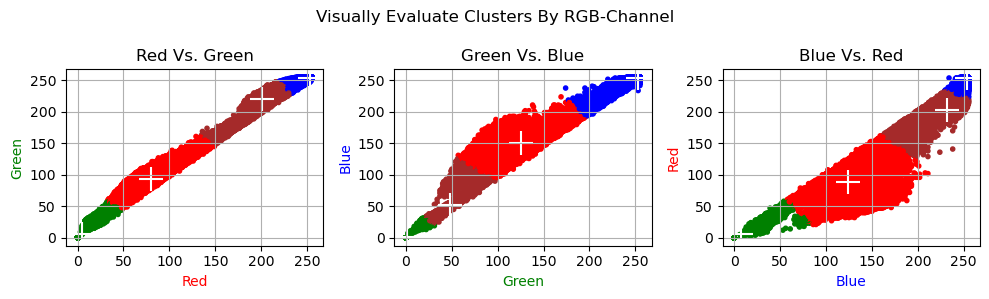

In [62]:
#%%time
#from datetime import datetime
# Cluster the pixels by pairs of RGB channels

# Make an instance of KMeans:


# colors for plotted pixels
colormap = np.array(['r', 'b', 'g', 'brown']) 

# It takes too long to display every pixel and is unnecessary at this 
# stage; inspection suggests that every 5th pixel is close enough.
every_nth = 5

df_small_indices = np.arange(0, df.shape[0], every_nth)
print("Indices for df_small:", df_small_indices)
df_small = df.iloc[df_small_indices, :] # full size: [3300, 2548]
display(df_small)

# Visually evaluate the clusters
fig, ax = plt.subplots(figsize=(10, 3), nrows=1, ncols=3, 
                       layout='tight')
for idx, df_2cols in list(enumerate([df_small.loc[:, c_pair] for \
                c_pair in color_pairs])):
    print("Preparing plot", str(idx)+ '... ', end='')  # debugging
    x = df_small.loc[:, color_pairs[idx]]
    kmeans.fit(x)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    plt.suptitle("Visually Evaluate Clusters By RGB-Channel")
    ax[idx].grid()
    ax[idx].scatter(x[color_pairs[idx][0]], x[color_pairs[idx][1]], 
                    c=colormap[labels], marker='.')
    ax[idx].scatter(centroids[:,0], centroids[:,1], s = 300, 
                    marker = '+', c = 'white')

    ax[idx].set_xlabel(colorname_pairs[idx][0], 
                       color=colorname_pairs[idx][0])
    ax[idx].set_ylabel(colorname_pairs[idx][1], 
                       color=colorname_pairs[idx][1])
    ax[idx].set_title(colorname_pairs[idx][0] + ' Vs. ' + \
                      colorname_pairs[idx][1])
print("Prepared")

save_figure_per_user("Fig-3-Vis-Eval-Clusters")
plt.show()

In [63]:
# Choose colors for output image
white_color = [255, 255, 255]
black_color = [0, 0, 0]

# Ranges of R, G, B channels for light blue pixels:
# Channel: r; min: 190, max: 218
# Channel: g; min: 215, max: 244
# Channel: b; min: 229, max: 253
lightblue_color = [205, 230, 240]

# Channel ranges for dark blue pixels:
# Channel: r; min: 36, max: 123
# Channel: g; min: 63, max: 144
# Channel: b; min: 117, max: 196
darkblue_color = [36, 63, 117]

colors = [darkblue_color, white_color, black_color, lightblue_color]

#x = df.loc[:, ['r', 'b']] # kmeans misses light blue using these
x = df.loc[:, ['r', 'g']]
kmeans.fit(x) # we _do_ need to refit
predictions = DF(kmeans.predict(x))

df_predics = DF(predictions)
df_predics.columns = ['Class']

# Create new dataframe containing points' RGB-colors
rgb = [[colors[i]] for i in df_predics['Class']]
df_rgb = DF(rgb)
df_rgb.columns = ['RGB']

# Incorporate it into dataset
df_class_rgb = pd.concat([df, df_predics, df_rgb], axis=1)
display(df_class_rgb)

,r,g,b,Class,RGB
0,255,255,255,1,"[255, 255, 255]"
1,255,255,255,1,"[255, 255, 255]"
...,...,...,...,...,...
8408398,255,255,255,1,"[255, 255, 255]"
8408399,255,255,255,1,"[255, 255, 255]"


In [64]:
# Get the range of RGB-values for the light blue pixels 
# (done, results in previous cell's comments)
'''
png_path_blues = base_dir + "blue-pixels.png"

img_blues = Image.open(png_path_blues)

# Convert to numpy array
png_blues = np.asarray(img_blues)
im_height_blues, im_width_blues = (img_blues.height, img_blues.width)

# Convert to array of RGB-triples (delete alpha-values)
img_blues = png_blues.ravel().reshape(im_height_blues * im_width_blues, 4)[:, :3]

# Convert numpy array of image to dataframe
features = ['r', 'g', 'b']
df_blues = DF(img_blues, columns=features)

print("Channel ranges for light blue pixels:")
for channel in features:
    print(f"Channel: {channel}; min: {df_blues[channel].min()}, "
    f"max: {df_blues[channel].max()}")
'''
None

In [65]:
# Get the range of RGB-values for the dark blue pixels
# (done, results in previous cell's comments)
'''
png_path_darkblues = base_dir + "dark_blues.png"

img_darkblues = Image.open(png_path_darkblues)

# Convert to numpy array
png_darkblues = np.asarray(img_darkblues)
im_height_dkblue, im_width_dkblue = (img_darkblues.height, img_darkblues.width)

# Convert to array of RGB-triples (delete alpha-values)
img_darkblues = png_darkblues.ravel().reshape(im_height_dkblue * \
    im_width_dkblue, 4)[:, :3]

# Convert numpy array of image to dataframe
features = ['r', 'g', 'b']
df_darkblues = DF(img_darkblues, columns=features)

print("Channel ranges for dark blue pixels:")
for channel in features:
    print(f"Channel: {channel}; min: {df_darkblues[channel].min()}, " 
    f"max: {df_darkblues[channel].max()}")
'''
None

In [66]:
# dfX is output array, 1 column of RGB-triples
dfX = df_class_rgb['RGB']

# Convert it into a numpy array
dfX_ar = np.array(dfX)

# Convert the list elements to numpy arrays
ar = np.array([v[:3] for v in dfX_ar])

# Final array to be displayed: reshape and convert dtype
ar_rshp = ar.reshape(im_height, im_width, 3).astype(np.uint8)

ar_rshp.shape: (3300, 2548, 3)
colormap2: ['#243f75' '#ffffff' '#000000' '#cde6f0']


Save image? ('' = No, ~'' = Yes):  y


Image saved in Fig-5-combined-images-and-clusters-20240806-174556.png


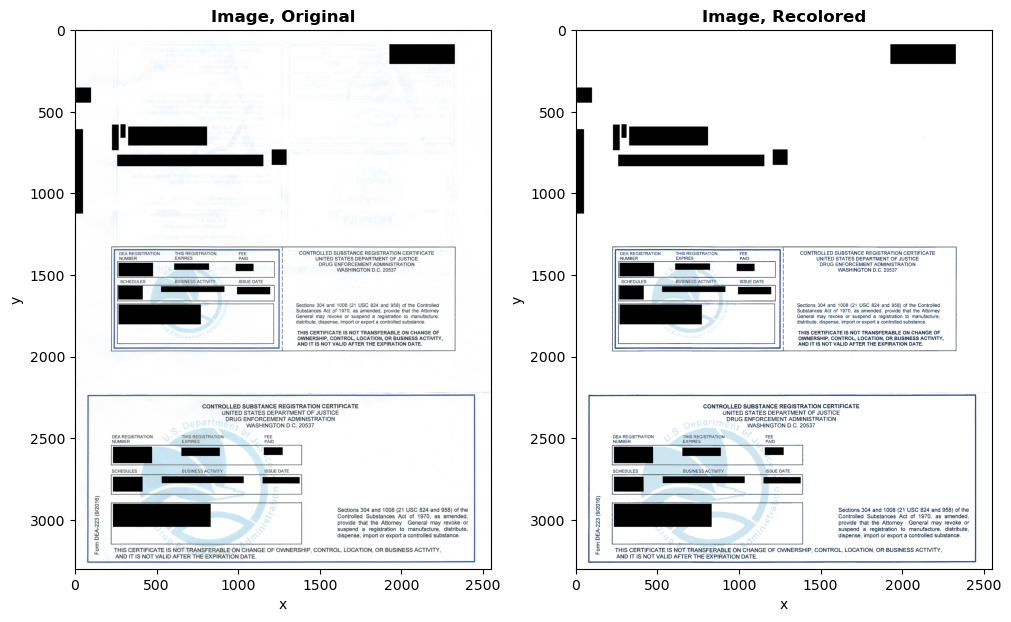

In [69]:
# Create a grid display showing input and output images,
# clusters with centroids
print('ar_rshp.shape:', ar_rshp.shape)

labels_br = ['g', 'r']
colormap2 = np.array([rgb_to_hex(color) for color in colors])
print('colormap2:', colormap2)

from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 8), layout="constrained")
gs = GridSpec(1, 2, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Image, Original", fontweight=600 )
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.imshow(img)

ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Image, Recolored", fontweight=600)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.imshow(ar_rshp)
save_figure_per_user("Fig-5-combined-images-and-clusters")
plt.show()

In [68]:
# Save new array into data file
image = Image.fromarray(ar_rshp, 'RGB')
outfilename = png_name.replace(".png", "-cleaned.png")
image.save(outfilename)